# Pre-processing data 2



## Dataset description

We will be using three datasets in the files `airlines.csv`, `airports.csv` and `flights.csv` for this homework, which contain data on airlines, airports and flights in the US.

In `airlines.csv` the columns are:
* AIRLINE_CODE
* AIRLINE

In `airports.csv` the columns are:
* AIRPORT_CODE
* AIRPORT
* CITY

In `flights.csv` the columns are:
* AIRLINE_CODE
* FLIGHT_NUMBER
* TAIL_NUMBER
* ORIGIN_AIRPORT
* DESTINATION_AIRPORT
* AIR_TIME
* DISTANCE
* CANCELLED (0 for false, 1 for true)

Firstly, the necessary packages are imported (make sure you run the cell):

In [3]:
import pandas as pd
import csv

## Load and explore the data

1a. Load each of the CSV files into a pandas DataFrame

Hint: use the keyword arguments `on_bad_lines='skip'` and `encoding='unicode_escape'`

In [4]:
df_flights = pd.read_csv('flights.csv' , on_bad_lines='skip', encoding='unicode_escape')

df_airlines = pd.read_csv('airlines.csv' , on_bad_lines='skip', encoding='unicode_escape')

df_airports = pd.read_csv('airports.csv' , on_bad_lines='skip', encoding='unicode_escape')

1b. Display the first 5 lines of each DataFrame

In [5]:
df_flights.head()

,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,CANCELLED
0,AS,98.0,N407AS,ANC,SEA,169.0,1448,0
1,AA,2336.0,N3KUAA,LAX,PBI,263.0,2330,0
2,US,840.0,N171US,SFO,CLT,266.0,2296,0
3,AA,258.0,N3HYAA,LAX,MIA,258.0,2342,0
4,AS,135.0,N527AS,SEA,ANC,199.0,1448,0


In [6]:
df_airlines.head()

,AIRLINE_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [7]:
df_airports.head()

,AIRPORT_CODE,AIRPORT,CITY
0,ABE,Lehigh Valley International Airport,Allentown
1,ABI,Abilene Regional Airport,Abilene
2,ABQ,Albuquerque International Sunport,Albuquerque
3,ABR,Aberdeen Regional Airport,Aberdeen
4,ABY,Southwest Georgia Regional Airport,Albany


1c. Using a single method, conduct some quick statistical analysis on the flights data

In [8]:
df_flights.describe()

,FLIGHT_NUMBER,AIR_TIME,DISTANCE,CANCELLED
count,956.000000,858.000000,998.000000,998.000000
mean,2055.721757,128.489510,914.120240,0.084168
std,1911.587644,74.877141,600.690083,0.277779
min,9.000000,15.000000,67.000000,0.000000
25%,604.500000,69.250000,437.500000,0.000000
50%,1313.500000,119.500000,838.000000,0.000000
75%,2967.750000,164.000000,1191.500000,0.000000
max,7423.000000,390.000000,2762.000000,1.000000


## Handle missing values

2a. Check which columns have missing values in the flight data

In [9]:
df_flights.isnull().sum()

AIRLINE_CODE            49
FLIGHT_NUMBER           42
TAIL_NUMBER             54
ORIGIN_AIRPORT          92
DESTINATION_AIRPORT     60
AIR_TIME               140
DISTANCE                 0
CANCELLED                0
dtype: int64

2b. Remove all rows with missing values in columns `AIRLINE_CODE` and `FLIGHT_NUMBER`

In [10]:
df_flights = df_flights.dropna(subset=['AIRLINE_CODE','FLIGHT_NUMBER'])

2c. Replace missing any missing values in the `TAIL_NUMBER`, `ORIGIN_AIRPORT` and `DESTINATION_AIRPORT` columns with the string value "UKNONWN"

In [11]:
df_flights["TAIL_NUMBER"] = df_flights["TAIL_NUMBER"].fillna("UKNOWNN")

df_flights['ORIGIN_AIRPORT'] = df_flights['ORIGIN_AIRPORT'].fillna("UKNOWNN")

df_flights['DESTINATION_AIRPORT'] = df_flights['DESTINATION_AIRPORT'].fillna("UKNOWNN")

2d. Replace any missing values in the `AIR_TIME` column with the average air time

In [12]:
average_air_time = df_flights['AIR_TIME'].mean()

df_flights['AIR_TIME'] = df_flights['AIR_TIME'].fillna(average_air_time)

## Join tables

3a. Join airline data on the flight data based on the `AIRLINE_CODE`, taking rows where `AIRLINE_CODE` appears in both datasets

In [13]:
airline_flight_merge = df_flights.merge(df_airlines, left_on='AIRLINE_CODE', right_on='AIRLINE_CODE', how='left')

3b. Now we want to join the dataframe with the airport data to identify which airport the flight has taken off from.

Join them using the `ORIGIN_AIRPORT` column from the merged dataframe and the `AIRPORT_CODE` from the airports dataframe.

In [14]:
airline_flight_airport_merge = airline_flight_merge.merge(df_airports, left_on='ORIGIN_AIRPORT', right_on='AIRPORT_CODE', how='left')

3d. View the first five rows of your fully merged dataframe

In [15]:
airline_flight_airport_merge.head()

,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,CANCELLED,AIRLINE,AIRPORT_CODE,AIRPORT,CITY
0,AS,98.0,N407AS,ANC,SEA,169.0,1448,0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage
1,AA,2336.0,N3KUAA,LAX,PBI,263.0,2330,0,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles
2,US,840.0,N171US,SFO,CLT,266.0,2296,0,US Airways Inc.,SFO,San Francisco International Airport,San Francisco
3,AA,258.0,N3HYAA,LAX,MIA,258.0,2342,0,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles
4,AS,135.0,N527AS,SEA,ANC,199.0,1448,0,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle


## One-hot encoding

4. One-hot encode (binarise) the `AIRLINE` column to have a separate column for each airline

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(airline_flight_airport_merge[['AIRLINE']])

airline_flight_airport_encoded = encoder.transform(airline_flight_airport_merge[['AIRLINE']])
df_airline_flight_airport = pd.DataFrame(airline_flight_airport_encoded.toarray(), columns = encoder.get_feature_names_out(['AIRLINE']))
airline_flight_airport_merge.reset_index(drop=True, inplace=True)
airline_flight_airport_merge = pd.concat([airline_flight_airport_merge, df_airline_flight_airport], axis=1).drop(['AIRLINE'], axis = 1)
airline_flight_airport_merge

,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,CANCELLED,AIRPORT_CODE,AIRPORT,...,AIRLINE_Delta Air Lines Inc.,AIRLINE_Frontier Airlines Inc.,AIRLINE_Hawaiian Airlines Inc.,AIRLINE_JetBlue Airways,AIRLINE_Skywest Airlines Inc.,AIRLINE_Southwest Airlines Co.,AIRLINE_Spirit Air Lines,AIRLINE_US Airways Inc.,AIRLINE_United Air Lines Inc.,AIRLINE_Virgin America
0,AS,98.0,N407AS,ANC,SEA,169.000000,1448,0,ANC,Ted Stevens Anchorage International Airport,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AA,2336.0,N3KUAA,LAX,PBI,263.000000,2330,0,LAX,Los Angeles International Airport,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,US,840.0,N171US,SFO,CLT,266.000000,2296,0,SFO,San Francisco International Airport,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,AA,258.0,N3HYAA,LAX,MIA,258.000000,2342,0,LAX,Los Angeles International Airport,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AS,135.0,N527AS,SEA,ANC,199.000000,1448,0,SEA,Seattle-Tacoma International Airport,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,WN,1432.0,N346SW,CMH,TPA,114.000000,829,0,CMH,Port Columbus International Airport,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
908,WN,1863.0,N253WN,DAL,BWI,131.000000,1209,0,DAL,Dallas Love Field,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
909,WN,665.0,N684WN,DAL,STL,129.489144,546,1,DAL,Dallas Love Field,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
910,WN,323.0,N340LV,FLL,BWI,129.000000,925,0,FLL,Fort Lauderdale-Hollywood International Airport,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Standardising

5. Finally, standardise the `AIR_TIME` column

In [17]:
from sklearn.preprocessing import StandardScaler

airline_flight_airport_merge['AIR_TIME'] = StandardScaler().fit_transform(airline_flight_airport_merge[['AIR_TIME']])

## Extension: Show data

Plot a bar chart showing the number of cancelled flights for each airline.



In [72]:
df_flights2 = df_flights.groupby(["AIRLINE_CODE"])["CANCELLED"].count()

df_flights2

AIRLINE_CODE
AA    131
AS     59
B6     91
DL    101
EV     68
F9     32
HA     17
MQ     58
NK     39
OO    113
UA     84
US     55
VX      4
WN     60
Name: CANCELLED, dtype: int64

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


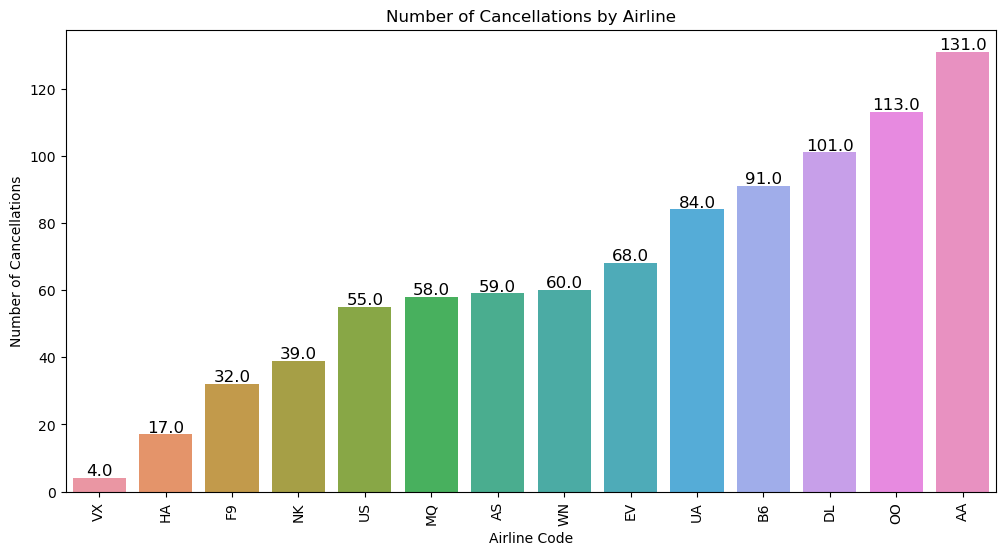

In [78]:
# Reset the index to make "AIRLINE_CODE" a regular column
#df_flights2.reset_index(inplace=True)

# Assuming df_flights2 is a Series
df_flights2 = df_flights2.to_frame().reset_index()

# Sort the DataFrame by the "CANCELLED" column in ascending order
df_flights2 = df_flights2.sort_values(by="CANCELLED")

# Create a barplot using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
ax =sns.barplot(data=df_flights2, x="AIRLINE_CODE", y="CANCELLED")

# Customize the plot (e.g., labels and titles)
plt.xlabel("Airline Code")
plt.ylabel("Number of Cancellations")
plt.title("Number of Cancellations by Airline")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display text labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')


# Show the plot
plt.show()